In [111]:
import pandas as pd

In [112]:
data = pd.read_csv('RentPrediction-Dataset.csv')

In [113]:
data.head()

,Unnamed: 0,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,0,denton,Eighteen 51 Brinker,1-3,?,"700-1,350",3.2857142857142856,"1851 Brinker Rd, Denton, TX 76208",1,1,1,?,1,1,1,1,1,"1,449-2,499"
1,1,denton,Elan Denton,1-3,?,"630-1,404",3.142857142857143,"1501 Northstar Rd, Denton, TX 76208",1,1,1,?,1,1,0,1,1,"1,534-2,420"
2,2,denton,Epic Apartments,1-3,?,"633-1,180",3.5714285714285716,"3200 S Interstate 35 E, Denton, TX 76210",0,1,1,?,1,1,0,1,1,"1,240-1,350"
3,3,denton,Epoch on Eagle,Studio-2,?,"507-1,177",3.4285714285714284,"903 Avenue C, Denton, TX 76201",1,1,1,?,1,1,0,0,1,"1,350-2,479"
4,4,denton,32hundred Windsor,1-2,?,"812-1,185",3.0,"3200 W Windsor Dr, Denton, TX 76207",0,1,1,?,0,1,0,0,1,"1,395-2,970"


In [114]:
data=data.drop(["Unnamed: 0"], axis = 1)
data=data.drop(["City"], axis = 1)
data=data.drop(["Names"], axis = 1)
data=data.drop(["Bath"], axis = 1)
data=data.drop(["location"], axis = 1)
data=data.drop(["gated"], axis = 1)

In [115]:
data.head()

,Bed,Area,Rating,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,1-3,"700-1,350",3.2857142857142856,1,1,1,1,1,1,1,1,"1,449-2,499"
1,1-3,"630-1,404",3.142857142857143,1,1,1,1,1,0,1,1,"1,534-2,420"
2,1-3,"633-1,180",3.5714285714285716,0,1,1,1,1,0,1,1,"1,240-1,350"
3,Studio-2,"507-1,177",3.4285714285714284,1,1,1,1,1,0,0,1,"1,350-2,479"
4,1-2,"812-1,185",3.0,0,1,1,0,1,0,0,1,"1,395-2,970"


In [116]:
data.isnull().sum()

Bed              0
Area             0
Rating           0
petsallowed      0
pool             0
fitnessCenter    0
grill            0
closet           0
washerdryer      0
countertops      0
access           0
Rent             0
dtype: int64

In [117]:
data.dtypes

Bed              object
Area             object
Rating           object
petsallowed      object
pool             object
fitnessCenter    object
grill            object
closet           object
washerdryer      object
countertops      object
access           object
Rent             object
dtype: object

In [118]:
import warnings
warnings.filterwarnings("ignore")

In [119]:
##Dealing with range values of area
for i in range(len(data['Area'])):
    k=str(data['Area'][i])
    if "-" in k:
        m=k.find('-')
        n=len(k)
        a=k[0:m]
        b=k[m+1:n]
        a=a.replace(',','').replace(' ','')
        b=b.replace(',','').replace(' ','')
        avg=(float(a)+float(b))/2
        avg=str(avg)
        data['Area'][i]=avg
    elif "," in k:
        c=k.replace(',','').replace(' ','')
        data['Area'][i]=c

In [120]:
## Dealing with range values of rent
for i in range(len(data['Rent'])):
    k=str(data['Rent'][i])
    if "-" in k:
        m=k.find('-')
        n=len(k)
        a=k[0:m]
        b=k[m+1:n]
        a=a.replace(',','').replace(' ','')
        b=b.replace(',','').replace(' ','')
        avg=(float(a)+float(b))/2
        avg=str(avg)
        data['Rent'][i]=avg
    elif "," in k:
        c=k.replace(',','').replace(' ','')
        data['Rent'][i]=c   

In [121]:
data['Rent']

0       1974.0
1       1977.0
2       1295.0
3       1914.5
4       2182.5
         ...  
2047    1473.5
2048    1679.0
2049    1378.0
2050    1737.5
2051    1422.0
Name: Rent, Length: 2052, dtype: object

In [122]:
data.dtypes

Bed              object
Area             object
Rating           object
petsallowed      object
pool             object
fitnessCenter    object
grill            object
closet           object
washerdryer      object
countertops      object
access           object
Rent             object
dtype: object

In [123]:
 data['Bed'].unique()

array(['1-3 ', 'Studio-2 ', '1-2 ', '1-4 ', '3-4 ', 'Studio-4 ', '2-4 ',
       '3 ', 'Studio-3 ', '2 ', '2-5 ', '1 ', '2-3 ', 'Studio-1 ', '?',
       'Studio '], dtype=object)

In [124]:
## label encoding the bed
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Bed'] = labelencoder.fit_transform(data['Bed'])

In [125]:
data['Bed'].unique()

array([ 2, 13,  1,  3,  9, 15,  6,  8, 14,  4,  7,  0,  5, 12, 10, 11])

In [126]:
data.head()

,Bed,Area,Rating,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,2,1025.0,3.2857142857142856,1,1,1,1,1,1,1,1,1974.0
1,2,1017.0,3.142857142857143,1,1,1,1,1,0,1,1,1977.0
2,2,906.5,3.5714285714285716,0,1,1,1,1,0,1,1,1295.0
3,13,842.0,3.4285714285714284,1,1,1,1,1,0,0,1,1914.5
4,1,998.5,3.0,0,1,1,0,1,0,0,1,2182.5


In [128]:
import numpy as np
data = data.replace('?', np.nan)
data = data.replace('nan', np.nan)
data = data.replace('Call for Rent', np.nan)
data = data.replace('Contact for Rates', np.nan)
data = data.replace(',', '')

In [129]:
data.isnull().sum()

Bed                0
Area             171
Rating           159
petsallowed      321
pool              94
fitnessCenter     94
grill             94
closet            94
washerdryer       94
countertops       94
access            94
Rent             191
dtype: int64

In [132]:
# we will replace the caatgeroical null data  data with the mode
data['Area'].fillna(data['Area'].mode()[0], inplace=True)
data['Rating'].fillna(data['Rating'].mode()[0], inplace=True)
data['petsallowed'].fillna(data['petsallowed'].mode()[0], inplace=True)
data['pool'].fillna(data['pool'].mode()[0], inplace=True)
data['fitnessCenter'].fillna(data['fitnessCenter'].mode()[0], inplace=True)
data['grill'].fillna(data['grill'].mode()[0], inplace=True)
data['closet'].fillna(data['closet'].mode()[0], inplace=True)
data['washerdryer'].fillna(data['washerdryer'].mode()[0], inplace=True)
data['countertops'].fillna(data['countertops'].mode()[0], inplace=True)
data['access'].fillna(data['access'].mode()[0], inplace=True)
data['Rent'].fillna(data['Rent'].mode()[0], inplace=True)

In [173]:
data.isnull().sum()

Bed              0
Area             0
Rating           0
petsallowed      0
pool             0
fitnessCenter    0
grill            0
closet           0
washerdryer      0
countertops      0
access           0
Rent             0
dtype: int64

In [174]:
len(data['Bed'])

2052

In [175]:
data.head(5)

,Bed,Area,Rating,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,2.0,1025.0,3.285714,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1974.0
1,2.0,1017.0,3.142857,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1977.0
2,2.0,906.5,3.571429,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1295.0
3,13.0,842.0,3.428571,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1914.5
4,1.0,998.5,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2182.5


In [176]:
a={
}

for i in a:
    data[i]=data[i].astype(float)

In [177]:
data.dtypes

Bed              float64
Area             float64
Rating           float64
petsallowed      float64
pool             float64
fitnessCenter    float64
grill            float64
closet           float64
washerdryer      float64
countertops      float64
access           float64
Rent             float64
dtype: object

<AxesSubplot:>

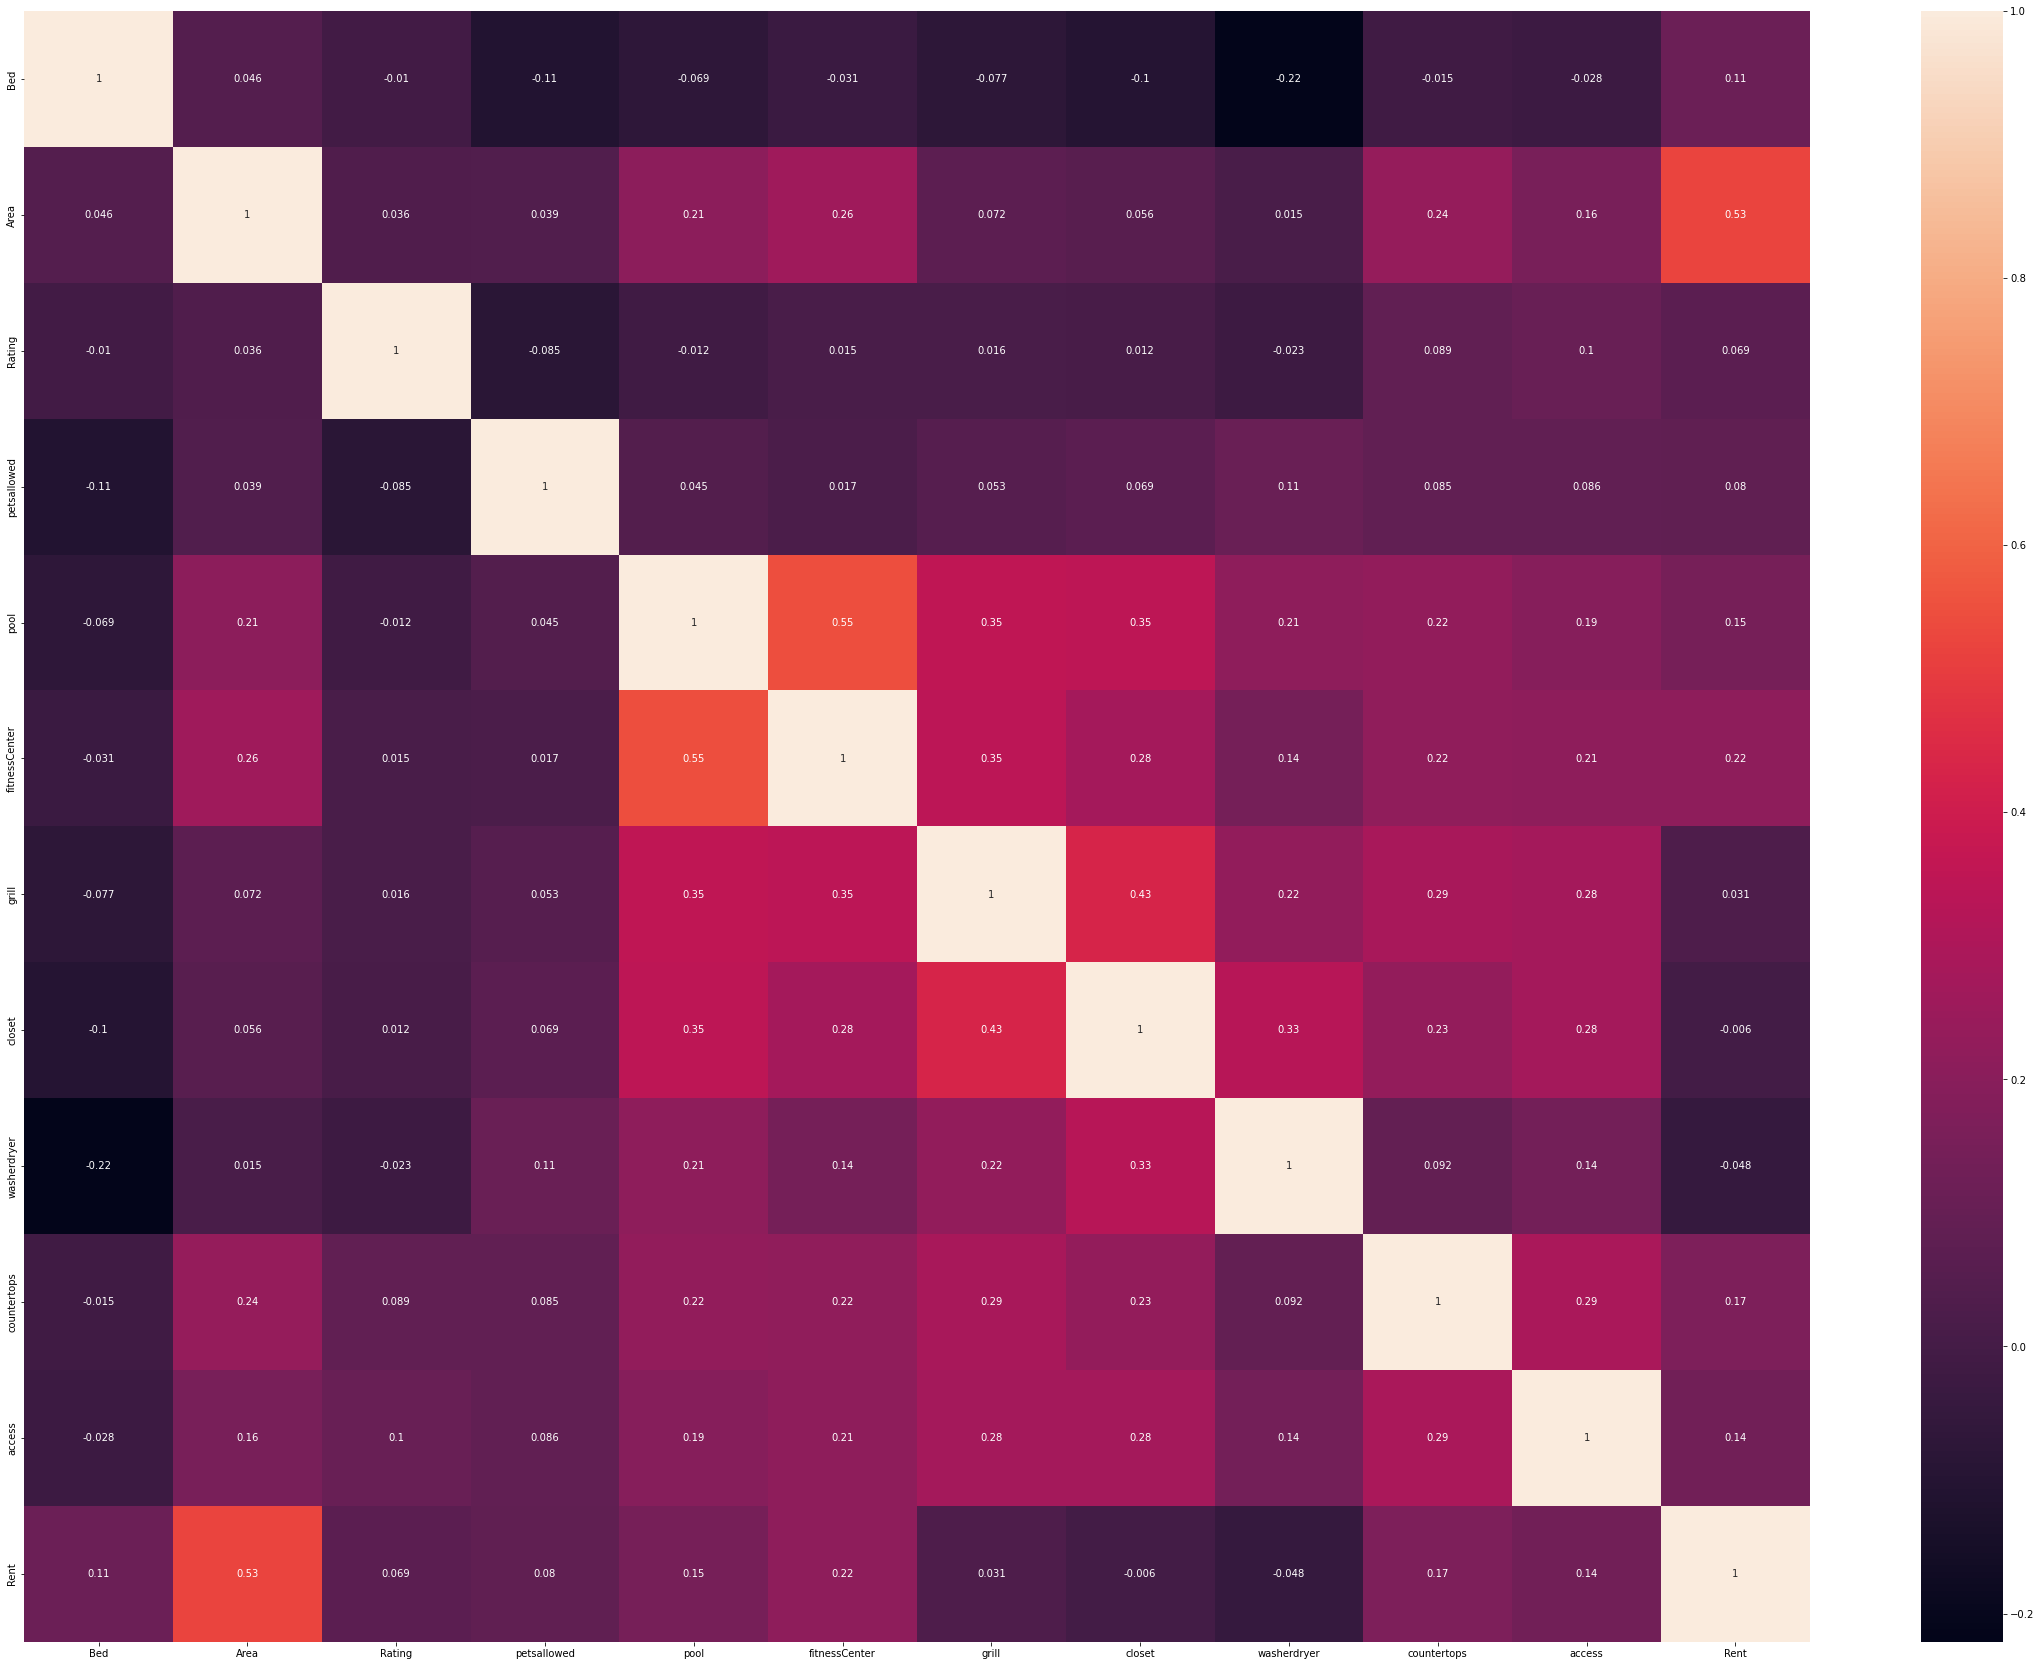

In [192]:
from matplotlib import pyplot as plt
import seaborn as sb
corr = data.corr()
plt.figure(figsize=(40,30))
sb.heatmap(corr,annot=True)

In [195]:
## Assigning values to our predictor variable X and target varible y
#X = data.drop(['Rent'], axis=1).values
X= data[['Area','pool']]
y = data[['Rent']].values

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [197]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_ss = sc.fit_transform(X_train)
x_test_ss = sc.fit_transform(X_test)

In [198]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_ss, y_train)

LinearRegression()

In [199]:
y_pred = lr.predict(x_train_ss)

In [200]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [201]:
print("linear regression score: ",lr.score(x_train_ss, y_train))
print("linear regression score: ",lr.score(x_test_ss, y_test))

linear regression score:  0.27774278802957264
linear regression score:  0.2850153665408721


In [202]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [155]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [156]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_ss, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train_ss), y_true=y_train)

In [157]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train_ss, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train_ss), y_true=y_train)

In [158]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(x_train_ss, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train_ss), y_true=y_train)

In [159]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
  
# Panggil mse
mse

,train,test
KNN,15745.660689,15950.95109
RF,36253.6223,37905.397686
Boosting,12655.302178,12995.364817


In [164]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr.fit(x_train_ss, y_train)
y_pred = rr.predict(x_train_ss)
print("rr score: ",rr.score(x_train_ss, y_train))

rr score:  0.3113033612549383


In [185]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train_ss, y_train)
y_pred = rf.predict(x_train_ss)
print("rf training score: ",rf.score(x_train_ss, y_train))

rf training score:  0.8890103793902812


In [186]:
print("rf testing score: ",rf.score(x_test_ss, y_test))

rf testing score:  0.28272546335494964


In [188]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpc=GaussianProcessRegressor()
gpc.fit(x_train_ss, y_train)
y_pred = gpc.predict(x_train_ss)
print("gpc training score: ",gpc.score(x_train_ss, y_train))

gpc training score:  0.9994065078918981


In [189]:
print("rf testing score: ",gpc.score(x_test_ss, y_test))

rf testing score:  -49133.58670509411
